### Importing the data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se


df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:

df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:

df_fs2.columns = col(601,'fs2')

In [11]:
df_vs1.columns = col(61,'vs1')

In [12]:
df_ce.columns = col(61,'ce')

In [13]:
df_cp.columns = col(61,'cp')

In [14]:
df_ps = pd.concat([df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_vs1], axis = 1)


In [15]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps4_1,ps4_2,ps4_3,ps4_4,ps4_5,ps4_6,ps4_7,ps4_8,ps4_9,ps4_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [16]:
#pip install tsfresh

### Function for window statistical features

In [17]:
df_ps4.filter(regex="ps_mean_.*").head()

""
0
1
2
3
4


In [18]:
def sensor_statistic(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].mean(axis=1)

    return df_statistic



In [19]:
window_length = 300
ps4_window_mean  = sensor_statistic(df_ps4, window_length, 'ps4_mean_')

ps5_window_mean  = sensor_statistic(df_ps5, window_length, 'ps5_mean_')

ps6_window_mean  = sensor_statistic(df_ps6, window_length, 'ps6_mean_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [20]:
window_length = 3
ts1_window_mean  = sensor_statistic(df_ts1, window_length, 'ts1_mean_')

ts2_window_mean  = sensor_statistic(df_ts2, window_length,'ts2_mean_')

ts3_window_mean  = sensor_statistic(df_ts3, window_length,'ts3_mean_')

ts4_window_mean  = sensor_statistic(df_ts4, window_length,'ts4_mean_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [21]:
window_length = 30

fs2_window_mean  = sensor_statistic(df_fs2, window_length,'fs2_mean_')


20 30 (2205, 600)


In [22]:
window_length = 3

ce_window_mean  = sensor_statistic(df_ce, window_length,'ce_mean_')

cp_window_mean  = sensor_statistic(df_cp, window_length,'cp_mean_')

vs1_window_mean  = sensor_statistic(df_vs1, window_length,'vs1_mean_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [23]:
mean_data = pd.concat([ps4_window_mean, ps5_window_mean, ps6_window_mean, 
                       ts1_window_mean, ts2_window_mean, ts3_window_mean, ts4_window_mean,
                      fs2_window_mean, vs1_window_mean, ce_window_mean, 
                      cp_window_mean], axis = 1)

In [24]:
mean_data.shape

(2205, 220)

### Calculate median for all sensors

In [25]:
def sensor_median(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].median(axis=1)

    return df_statistic



In [26]:
window_length = 300


ps4_window_median  = sensor_median(df_ps4, window_length, 'ps4_median_')

ps5_window_median  = sensor_median(df_ps5, window_length, 'ps5_median_')

ps6_window_median  = sensor_median(df_ps6, window_length, 'ps6_median_')


20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [27]:
window_length = 3
ts1_window_median  = sensor_median(df_ts1, window_length, 'ts1_median_')

ts2_window_median  = sensor_median(df_ts2, window_length,'ts2_median_')

ts3_window_median  = sensor_median(df_ts3, window_length,'ts3_median_')

ts4_window_median  = sensor_median(df_ts4, window_length,'ts4_median_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [28]:
window_length = 30

fs2_window_median  = sensor_median(df_fs2, window_length,'fs2_median_')


20 30 (2205, 600)


In [29]:
window_length = 3

ce_window_median  = sensor_median(df_ce, window_length,'ce_median_')

cp_window_median  = sensor_median(df_cp, window_length,'cp_median_')



vs1_window_median  = sensor_median(df_vs1, window_length,'vs1_median_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [30]:
median_data = pd.concat([ps4_window_median, ps5_window_median,ps6_window_median, 
                         ts1_window_median, ts2_window_median, ts3_window_median, ts4_window_median,
                         fs2_window_median, vs1_window_median, ce_window_median,
                                    cp_window_median], axis = 1)
                         

In [31]:
median_data.shape

(2205, 220)

### Finding the maximum 

In [32]:
def sensor_max(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].max(axis=1)

    return df_statistic



In [33]:
window_length = 300

ps4_window_max  = sensor_max(df_ps4, window_length, 'ps4_max_')

ps5_window_max  = sensor_max(df_ps5, window_length, 'ps5_max_')

ps6_window_max  = sensor_max(df_ps6, window_length, 'ps6_max_')


20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [34]:
window_length = 3
ts1_window_max  = sensor_max(df_ts1, window_length, 'ts1_max_')

ts2_window_max  = sensor_max(df_ts2, window_length,'ts2_max_')

ts3_window_max  = sensor_max(df_ts3, window_length,'ts3_max_')

ts4_window_max  = sensor_max(df_ts4, window_length,'ts4_max_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [35]:
window_length = 30


fs2_window_max  = sensor_max(df_fs2, window_length,'fs2_max_')


20 30 (2205, 600)


In [36]:
window_length = 3

ce_window_max  = sensor_max(df_ce, window_length,'ce_max_')

cp_window_max  = sensor_max(df_cp, window_length,'cp_max_')


vs1_window_max  = sensor_max(df_vs1, window_length,'vs1_max_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [37]:
max_data = pd.concat([ps4_window_max, ps5_window_max,ps6_window_max, 
                      ts1_window_max, ts2_window_max, ts3_window_max, ts4_window_max,
                      fs2_window_max, vs1_window_max,ce_window_max, cp_window_max], axis = 1)

In [38]:
max_data.shape

(2205, 220)

### Calculating the min 

In [39]:
def sensor_min(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].min(axis=1)

    return df_statistic


In [40]:
window_length = 300


ps4_window_min  = sensor_max(df_ps4, window_length, 'ps4_min_')

ps5_window_min  = sensor_max(df_ps5, window_length, 'ps5_min_')

ps6_window_min  = sensor_max(df_ps6, window_length, 'ps6_min_')



20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [41]:
window_length = 3
ts1_window_min  = sensor_min(df_ts1, window_length, 'ts1_min_')

ts2_window_min  = sensor_min(df_ts2, window_length,'ts2_min_')

ts3_window_min  = sensor_min(df_ts3, window_length,'ts3_min_')

ts4_window_min  = sensor_min(df_ts4, window_length,'ts4_min_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [42]:
window_length = 30

fs2_window_min  = sensor_min(df_fs2, window_length,'fs2_min_')


20 30 (2205, 600)


In [43]:
window_length = 3

ce_window_min  = sensor_min(df_ce, window_length,'ce_min_')

cp_window_min  = sensor_min(df_cp, window_length,'cp_min_')


vs1_window_min  = sensor_min(df_vs1, window_length,'vs1_min_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [44]:
Min_data = pd.concat([ps4_window_min, ps5_window_min,  ps6_window_min, ts1_window_min, ts2_window_min, 
                      ts3_window_min, ts4_window_min, fs2_window_min, vs1_window_min, 
                      ce_window_min, cp_window_min], axis = 1)

In [45]:
import statistics as st

### Calculate the variance 

In [46]:
def sensor_variance(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].var(axis=1)

    return df_statistic


In [47]:
window_length = 300

ps4_window_variance  = sensor_variance(df_ps4, window_length, 'ps4_variance_')

ps5_window_variance  = sensor_variance(df_ps5, window_length, 'ps5_variance_')

ps6_window_variance  = sensor_variance(df_ps6, window_length, 'ps6_variance_')


20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [48]:
window_length = 3
ts1_window_variance  = sensor_variance(df_ts1, window_length, 'ts1_variance_')

ts2_window_variance  = sensor_variance(df_ts2, window_length,'ts2_variance_')

ts3_window_variance  = sensor_variance(df_ts3, window_length,'ts3_variance_')

ts4_window_variance  = sensor_variance(df_ts4, window_length,'ts4_variance_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [49]:
window_length = 30


fs2_window_variance  = sensor_variance(df_fs2, window_length,'fs2_variance_')


20 30 (2205, 600)


In [50]:
window_length = 3

ce_window_variance  = sensor_variance(df_ce, window_length,'ce_variance_')

cp_window_variance  = sensor_variance(df_cp, window_length,'cp_variance_')


vs1_window_variance  = sensor_variance(df_vs1, window_length,'vs1_variance_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [51]:
variance_data = pd.concat([ps4_window_variance, ps5_window_variance,  ps6_window_variance, 
                           ts1_window_variance, ts2_window_variance, ts3_window_variance, ts4_window_variance, 
                           fs2_window_variance, vs1_window_variance, 
                           ce_window_variance, cp_window_variance], axis = 1)

### Calculating standard deviation

In [52]:
def sensor_std(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].std(axis=1)

    return df_statistic


In [53]:
window_length = 300

ps4_window_std  = sensor_std(df_ps4, window_length, 'ps4_std_')

ps5_window_std  = sensor_std(df_ps5, window_length, 'ps5_std_')

ps6_window_std  = sensor_std(df_ps6, window_length, 'ps6_std_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [54]:
window_length = 3
ts1_window_std  = sensor_std(df_ts1, window_length, 'ts1_std_')

ts2_window_std  = sensor_std(df_ts2, window_length,'ts2_std_')

ts3_window_std  = sensor_std(df_ts3, window_length,'ts3_std_')

ts4_window_std  = sensor_std(df_ts4, window_length,'ts4_std_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [55]:
window_length = 30

fs2_window_std  = sensor_std(df_fs2, window_length,'fs2_std_')


20 30 (2205, 600)


In [56]:
window_length = 3

ce_window_std  = sensor_std(df_ce, window_length,'ce_std_')

cp_window_std  = sensor_std(df_cp, window_length,'cp_std_')

vs1_window_std  = sensor_std(df_vs1, window_length,'vs1_std_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [57]:
std_data = pd.concat([ps4_window_std, ps5_window_std,  ps6_window_std,
                      ts1_window_std, ts2_window_std, ts3_window_std, ts4_window_std, fs2_window_std,
                      vs1_window_std, ce_window_std, cp_window_std], axis = 1)

### Calculating IQR

In [58]:
from scipy.stats import iqr


def sensor_iqr(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
        
            df_statistic[str(sensor)+str(i)] = iqr(dataframe[windows[i]],axis=1)

    return df_statistic


In [59]:
window_length = 300

ps4_window_iqr  = sensor_iqr(df_ps4, window_length, 'ps4_iqr_')

ps5_window_iqr  = sensor_iqr(df_ps5, window_length, 'ps5_iqr_')

ps6_window_iqr  = sensor_iqr(df_ps6, window_length, 'ps6_iqr_')


20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [60]:
window_length = 3
ts1_window_iqr  = sensor_iqr(df_ts1, window_length, 'ts1_iqr_')

ts2_window_iqr  = sensor_iqr(df_ts2, window_length,'ts2_iqr_')

ts3_window_iqr  = sensor_iqr(df_ts3, window_length,'ts3_iqr_')

ts4_window_iqr  = sensor_iqr(df_ts4, window_length,'ts4_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [61]:
window_length = 30

fs2_window_iqr  = sensor_iqr(df_fs2, window_length,'fs2_iqr_')


20 30 (2205, 600)


In [62]:
window_length = 3

ce_window_iqr  = sensor_iqr(df_ce, window_length,'ce_iqr_')

cp_window_iqr  = sensor_iqr(df_cp, window_length,'cp_iqr_')

vs1_window_iqr  = sensor_iqr(df_vs1, window_length,'vs1_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [63]:
iqr_data = pd.concat([ps4_window_iqr, ps5_window_iqr,  ps6_window_iqr,ts1_window_iqr, ts2_window_iqr, 
                      ts3_window_iqr, ts4_window_iqr, fs2_window_iqr,vs1_window_iqr, 
                      ce_window_iqr, cp_window_iqr], axis = 1)

### Merge all datasets to get the final dataset

In [64]:
Final = pd.concat([median_data, max_data, Min_data, std_data, variance_data, iqr_data], axis = 1)

In [65]:
Final.shape

(2205, 1320)

In [66]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)

In [67]:
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [68]:
Final_target = pd.concat([Final, profile], axis = 1)

In [69]:
Final_target.shape

(2205, 1325)

In [70]:
profile_cooler = profile['Cooler Condition']

## Cooler Classification



## Train test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(Final, profile_cooler, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_cooler)

**Create validation datasets**

In [73]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

100    519
20     512
3      512
Name: Cooler Condition, dtype: int64
100    222
20     220
3      220
Name: Cooler Condition, dtype: int64


**Dataset is fairly balanced**

## Standardisation of Data

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [77]:
X_train_scaled.columns = Final.columns 
X_test_scaled.columns = Final.columns 

In [78]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 1320)
(1543, 1320)


In [79]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [80]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### SVM for Cooler condition classification

### PCA

In [1]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

NameError: name 'X_train_scaled' is not defined

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [82]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train)
svm_predictions = svm_model_linear.predict(X_test_scaled)

In [83]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[220,   0,   0],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

In [84]:
def cmatrix(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_scaled,y_test, display_labels= ['Close to Failure','Reduced efficiency','Full Efficiency'],  ax = ax)
    return disp.confusion_matrix
    

array([[220,   0,   0],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

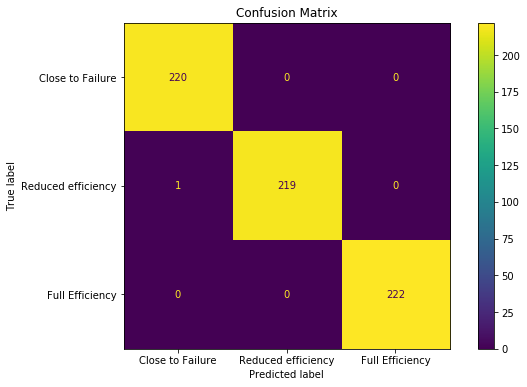

In [85]:
cmatrix(svm_model_linear)

In [86]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



In [87]:
y_score_svm = svm_model_linear.fit(X_train_scaled, y_train).decision_function(X_test)
y_score_svm

array([[-0.22202169,  2.26129106,  0.7932978 ],
       [ 2.3160656 ,  0.77338652, -0.31393136],
       [ 2.32308157,  0.71675112, -0.32092299],
       ...,
       [ 2.3225917 ,  0.71906911, -0.32034845],
       [ 2.32407269,  0.7109015 , -0.3220182 ],
       [-0.21356596,  2.26147804,  0.78338902]])

In [88]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

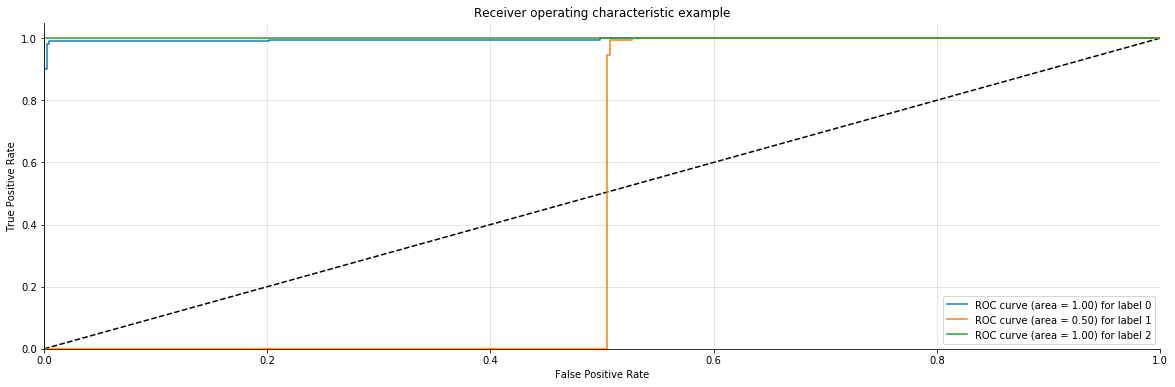

In [89]:
plot_multiclass_roc(y_score_svm,X_test_scaled, y_test, 3)

In [ ]:
print(metrics.classification_report(y_test, knn.predict(X_test_scaled)))

### Building an RF classifier for Cooler 

In [90]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

array([[220,   0,   0],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

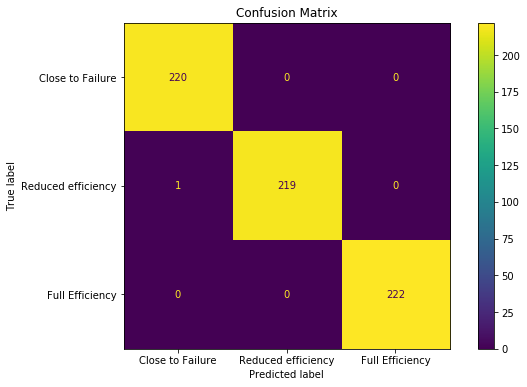

In [91]:
cmatrix(classifier_rf)

In [92]:
y_score_rf = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

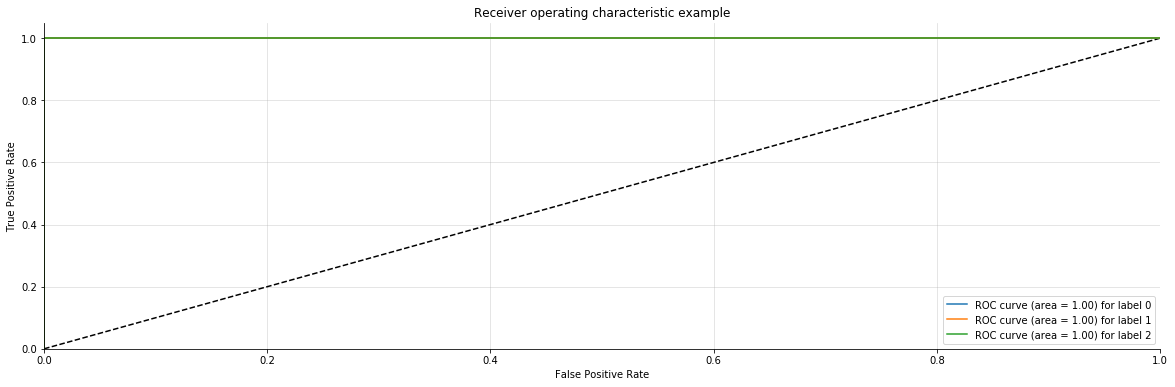

In [93]:
plot_multiclass_roc(y_score_rf, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

### Hypertune parameters

In [94]:
rf_hyper = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight = 'balanced')

In [95]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

## maximum depth is 1,2,5,10,20
## minimum sample leaf is 5,10,20,50,100
## maximum no. of features is 2,3,4
## no. of trees is 10, 30,50,100,200

In [96]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator= rf_hyper, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "f1_micro")

In [97]:
%%time
grid_search.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.0min finished


Wall time: 3min


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='f1_micro', verbose=1)

In [98]:
rf_best = grid_search.best_estimator_ ## best estimator is assigned to rf_best
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=4,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

array([[219,   0,   1],
       [  1, 219,   0],
       [  0,   1, 221]], dtype=int64)

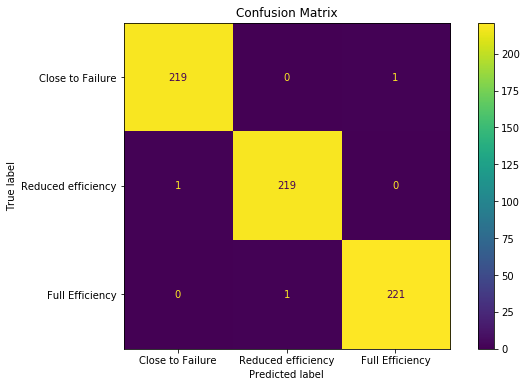

In [99]:
cmatrix(rf_best)

In [100]:
y_score_rf_hyper = rf_best.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf_hyper

array([[0.00227722, 0.        , 0.99772278],
       [0.0021932 , 0.99659531, 0.0012115 ],
       [1.        , 0.        , 0.        ],
       ...,
       [0.99857143, 0.00142857, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.00233189, 0.        , 0.99766811]])

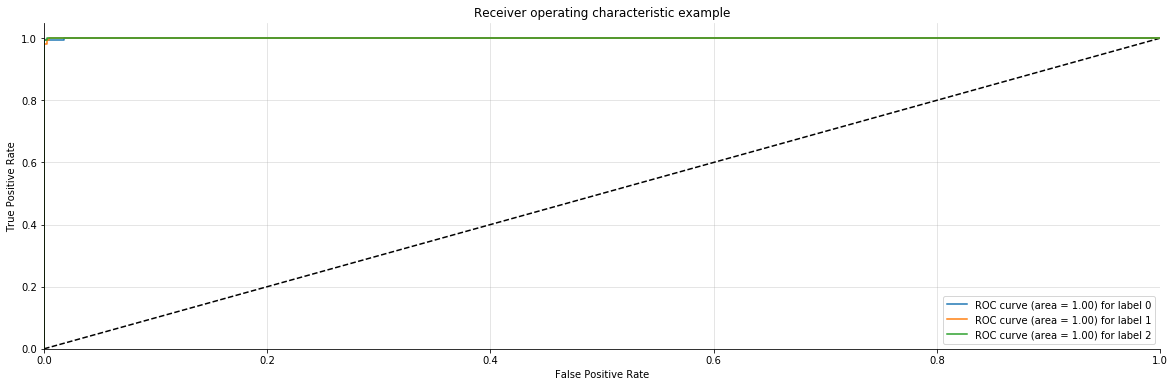

In [101]:
plot_multiclass_roc(y_score_rf_hyper, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [107]:
print(metrics.classification_report(y_test, rf_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



### kNN for cooler failure classification

In [102]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_scaled, y_train)


array([[219,   1,   0],
       [  4, 216,   0],
       [  0,   0, 222]], dtype=int64)

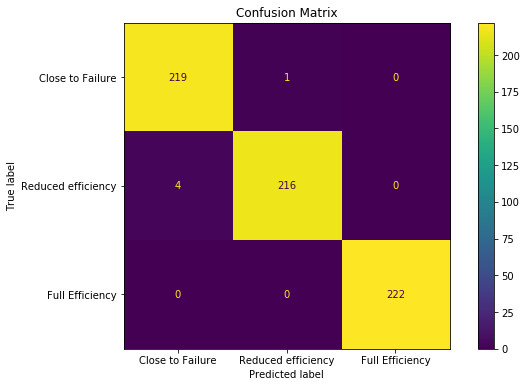

In [103]:
cmatrix(knn)

In [104]:
y_score_knn = knn.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_knn

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

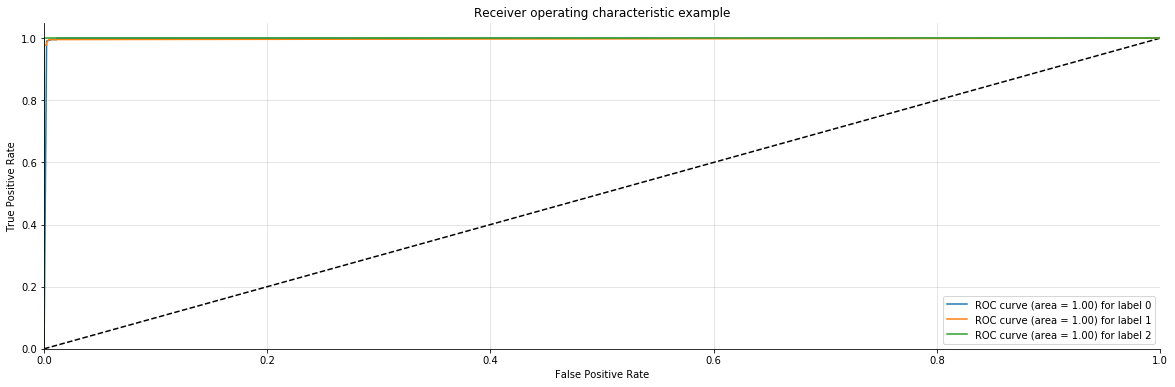

In [105]:
plot_multiclass_roc(y_score_knn, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [106]:
print(metrics.classification_report(y_test, knn.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       220
          20       1.00      0.98      0.99       220
         100       1.00      1.00      1.00       222

    accuracy                           0.99       662
   macro avg       0.99      0.99      0.99       662
weighted avg       0.99      0.99      0.99       662



### NOISE

In [108]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)
noise.shape

X_testnoise = X_test_scaled + noise

In [111]:
print(metrics.classification_report(y_test, rf_best.predict(X_testnoise)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



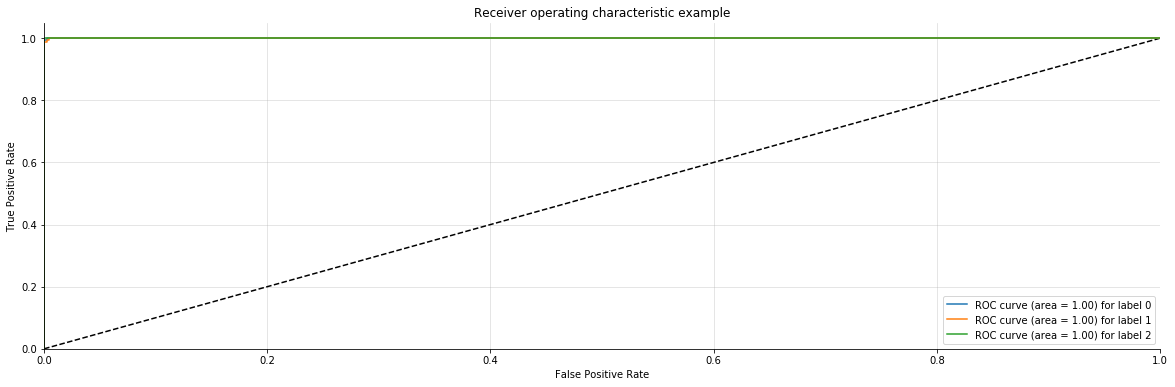

In [112]:
y_score_rfnoise = rf_best.fit(X_train_scaled, y_train).predict_proba(X_testnoise)

plot_multiclass_roc(y_score_rfnoise, X_testnoise, y_test, n_classes=3, figsize=(20, 6))

In [113]:
print(metrics.classification_report(y_test, knn.predict(X_testnoise)))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       220
          20       1.00      0.98      0.99       220
         100       1.00      1.00      1.00       222

    accuracy                           0.99       662
   macro avg       0.99      0.99      0.99       662
weighted avg       0.99      0.99      0.99       662



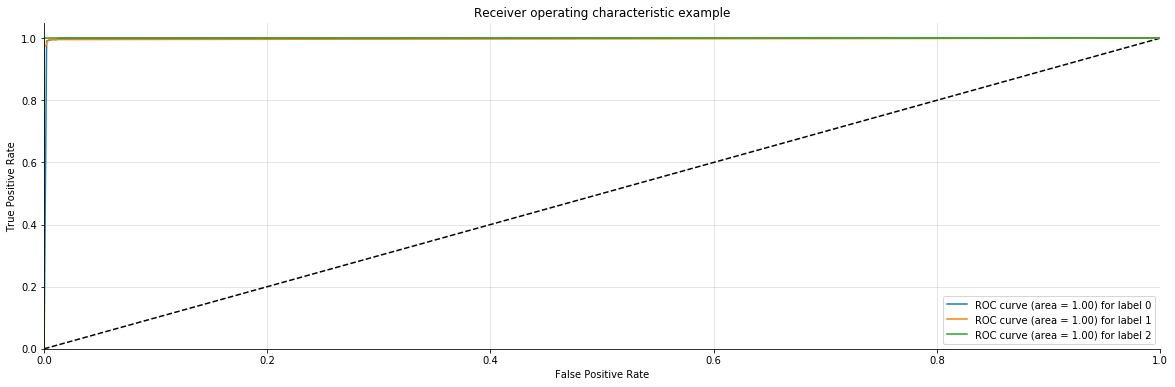

In [114]:
y_score_knnnoise = knn.fit(X_train_scaled, y_train).predict_proba(X_testnoise)

plot_multiclass_roc(y_score_knnnoise, X_testnoise, y_test, n_classes=3, figsize=(20, 6))